<a href="https://colab.research.google.com/github/mfajaranugrah/Tugas10_python/blob/main/Tugas10_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((140, 140))) / 255.0
	data.append(image)


	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [10]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 140, 140, 3)
(237, 140, 140, 3)


In [41]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(140*140*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(40, activation="relu", name="layer2"),
        Dense(40, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 58800)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               5880100   
_________________________________________________________________
layer2 (Dense)               (None, 40)                4040      
_________________________________________________________________
layer3 (Dense)               (None, 40)                1640      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 123       
Total params: 5,885,903
Trainable params: 5,885,903
Non-trainable params: 0
_________________________________________________________________


In [44]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)


[INFO] training network...
Epoch 1/30
23/23 [==============================] - 1s 39ms/step - loss: 1.6037 - accuracy: 0.6048 - val_loss: 1.0081 - val_accuracy: 0.7089
Epoch 2/30
23/23 [==============================] - 1s 32ms/step - loss: 0.3278 - accuracy: 0.8734 - val_loss: 0.9325 - val_accuracy: 0.7300
Epoch 3/30
23/23 [==============================] - 1s 32ms/step - loss: 0.2619 - accuracy: 0.9044 - val_loss: 1.0221 - val_accuracy: 0.6878
Epoch 4/30
23/23 [==============================] - 1s 30ms/step - loss: 0.2754 - accuracy: 0.8959 - val_loss: 0.8696 - val_accuracy: 0.7722
Epoch 5/30
23/23 [==============================] - 1s 31ms/step - loss: 0.2308 - accuracy: 0.9198 - val_loss: 0.8748 - val_accuracy: 0.7511
Epoch 6/30
23/23 [==============================] - 1s 32ms/step - loss: 0.1903 - accuracy: 0.9325 - val_loss: 0.9690 - val_accuracy: 0.7300
Epoch 7/30
23/23 [==============================] - 1s 32ms/step - loss: 0.2245 - accuracy: 0.9156 - val_loss: 0.9278 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


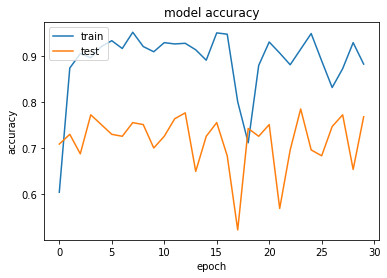

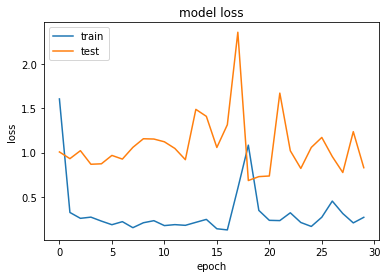

In [45]:
import matplotlib.pyplot as plt

print(H.history.keys())

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [47]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.78      0.82      0.80        89
      forest       0.77      0.76      0.77        80
     highway       0.74      0.71      0.72        68

    accuracy                           0.77       237
   macro avg       0.77      0.76      0.76       237
weighted avg       0.77      0.77      0.77       237



In [48]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [69]:
import cv2
import matplotlib.pyplot as plt
image1='P_20161030_091132.jpg'

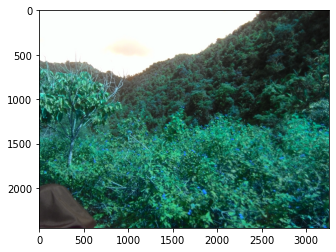

In [70]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [71]:
image_testing = Image.open('P_20161030_091132.jpg')
image_testing = np.array(image_testing.resize((140, 140))) / 255.0
image_testing.shape

(140, 140, 3)

In [72]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 140, 140, 3)


In [73]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.4362712e-05 9.9923730e-01 7.4824458e-04]]
['forest']
